In [2]:
import json
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import copy
import re

!pip install wget
import wget
import json
import tarfile
pd.set_option('max_colwidth', 300)

**Funcom code-comment tokenized dataset exploration**

In [ ]:
!wget https://s3.us-east-2.amazonaws.com/leclair.tech/data/funcom/funcom_tokenized.tar.gz
!tar -xf funcom_tokenized.tar.gz

--2020-12-13 08:23:49--  https://s3.us-east-2.amazonaws.com/leclair.tech/data/funcom/funcom_tokenized.tar.gz
Resolving s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)... 52.219.106.57
Connecting to s3.us-east-2.amazonaws.com (s3.us-east-2.amazonaws.com)|52.219.106.57|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211020526 (201M) [application/x-tar]
Saving to: ‘funcom_tokenized.tar.gz’

funcom_tokenized.ta 100%[===================>] 201.24M  48.0MB/s    in 4.6s    

2020-12-13 08:23:54 (43.9 MB/s) - ‘funcom_tokenized.tar.gz’ saved [211020526/211020526]



Preprocessed functions:
    Function ID                                                                   Function
0     43226887     public void mouse up final mouse event mouseevent modify save on click
1     43227058                                            public int get state return new
2     43227061                                          public int get state return clean
3     43227066                                   public string get sql command return sql
4     43227068  public void set sql command final string sql command this sql sql command


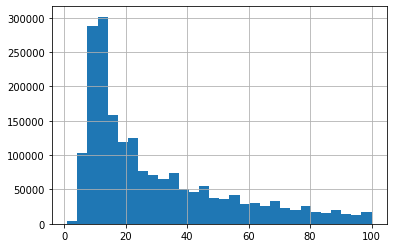

In [7]:
java_functions_data = pd.read_csv('funcom_tokenized/train/functions.train', sep="\t", header=None, names=['Function ID', 'Function'])
print("Preprocessed functions:\n", java_functions_data.head())
java_functions_data['token_length'] = java_functions_data['Function'].str.split().apply(len)

java_functions_data['token_length'].hist(bins = 30)

Comments:
    Comment ID  ... token_length
0    43226887  ...            8
1    43227058  ...           10
2    43227061  ...           10
3    43227066  ...           11
4    43227068  ...            9

[5 rows x 3 columns]


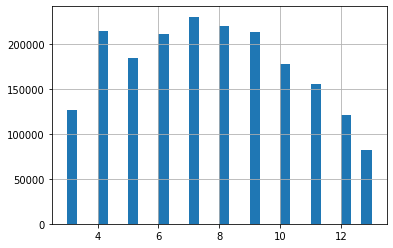

In [8]:
java_comments_data = data = pd.read_csv('funcom_tokenized/train/comments.train', sep="\t", header=None, names=['Comment ID', 'Comment'])
java_comments_data['token_length'] = java_comments_data['Comment'].str.split().apply(len)
java_comments_data['token_length'].hist(bins = 30)

print("Comments:\n", java_comments_data.head())

In [ ]:
def get_funcom_data(remove_id=True):
  dataset = []
  dataset_name = wget.download("https://s3.us-east-2.amazonaws.com/leclair.tech/data/funcom/funcom_tokenized.tar.gz")
  tar = tarfile.open("funcom_tokenized.tar.gz", "r:gz")
  #print([member.name for member in tar.getmembers()])
  for member in tar.getmembers():
    data = []
    if member.name == 'funcom_tokenized/comments' or member.name == 'funcom_tokenized/functions':
      file = tar.extractfile(member)
      for line in file:
        sentence = copy.copy(line.decode())
        sentence = re.sub(r'^.*?\t', '', sentence)
        sentence = re.sub(r'\n', '', sentence)
        data.append(sentence)
      dataset.append(data)

  return dataset

In [ ]:
dataset = get_funcom_data()

print("Comments:\n", dataset[0][:5])
print("\nFunctions:\n", dataset[1][:5])

Comments:
 ['writes the specified character into the buffer', 'create an ast node with the token type and text passed in but', 'changes the suit of the playing card', 'generates the most likely state predictions for the sequence', 'generates the most likely state predictions for the sequence']

Functions:
 [' public void write int c if c 1 current append char c if c n current new string buffer lines add current', ' public ast create int type string txt token first token last ast t ast factory create type txt if t null first null first copy details from first token t initialize first then ensure that type and txt are specific to this new node t initialize type txt if t instanceof groovy source ast last null groovy source ast node groovy source ast t node set last last this is a good point to call node set snippet but it bulks up the ast too much for production code return t', ' public void set suit int suit this suit suit', ' public prediction most likely short sequence return most like

In [ ]:
def get_json_data(remove_id=True, sample_size=20000, start_token='\t', end_token='\n'):
  dataset = []
  dataset_name = wget.download("https://s3.us-east-2.amazonaws.com/leclair.tech/data/funcom/funcom_filtered.tar.gz")
  tar = tarfile.open("funcom_filtered.tar.gz", "r:gz")

  for member in tar.getmembers():
    data = []
    size = 0
    if member.name == 'funcom_processed/comments.json' or member.name == 'funcom_processed/functions.json':
      file = tar.extractfile(member)

      data_df = pd.read_json(file.read(), orient='index')
      data_df.reset_index(drop=True, inplace=True)
      data_df.columns = ['Column']

      if member.name == 'funcom_filtered/comments.json':
          data_df['Column'] = start_token + data_df['Column'] + end_token
      size += 1
      dataset.append(data_df['Column'].tolist())

  return dataset

In [ ]:
json_dataset = get_json_data()

print("Comments:\n", json_dataset[1][:5])
print("\nFunctions:\n", json_dataset[0][:5])

Comments:
 ['\t/**\n\t * Returns the pushes lowerbound of this board position.\n\t * \n\t * @return the pushes lowerbound\n\t */\n', '\t/**\n\t * Sets the pushes lowerbound of this board position.\n\t * \n\t * @param pushesLowerbound\n\t */\n', '\t\t/**\n\t\t * Play a sound.\n\t\t */\n', '\t/**\n\t * Returns the influence value between the positions of the passed boxes.\n\t * <p>\n\t * The LOWER the influence value the more influence has the box on the other box.\n\t * \n\t * @param boxNo1  the position of the first  box whose position is considered\n\t * @param boxNo2  the position of the second box whose position is considered\n\t * @return the influence value \n\t */\n', '\t/**\n\t * Sets the box positions and the player position.\n\t *     \n\t * @param positions positions of the boxes and the player\n\t */\n']

Functions:
 ['\tpublic int getPushesLowerbound() {\n\t\treturn pushesLowerbound;\n\t}\n', '\tpublic void setPushesLowerbound(int pushesLowerbound) {\n\t\tthis.pushesLowerbo